东莞逐年PM2.5含量数据分析 & 数据可视化 & 使用回归模型预测

判断本地是否已有数据，若无数据，则爬取东莞市历年PM2.5每日数据

In [140]:
import time,requests,re
import os
import pandas as pd
from lxml import etree

def get_data():
    url='http://www.tianqihoubao.com/aqi/dongguang.html'
    headers={'user-agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.18362", }
    response=requests.get(url, headers=headers)
    html=response.text
    response=etree.HTML(html)
    url_list=response.xpath('//div[@class="box p"]//a/@href')
    for url in url_list:
        url='http://www.tianqihoubao.com'+url
        data=pd.read_html(url, header=0, encoding='gbk')[0]
        print(data)
        time.sleep(1)
        data.to_csv("pm2.5.csv",mode='a', header=False)


#判断本地是否已有数据，若无则运行爬虫
if(os.path.exists("pm2.5.csv")==False):    
    get_data()
else:
    print("本地已有数据！")


本地已有数据！


In [1]:
import pandas as pd
from matplotlib import  pyplot as plt
import seaborn as sns
import numpy as np
filename = "pm2.5.csv"

In [2]:
df=pd.read_csv(filename,names=['date','quality','AQI','ranking','PM2.5(μg/m3)','Pm10(μg/m3)','So2(μg/m3)','No2(μg/m3)','Co(mg/m3)','O3(μg/m3)'])
df   

#经验证爬取的文件无缺失和异常数据，故无需进行处理

#获取的数据如下，数据有 date、qulaity、AQI、ranking、PM2.5 等字段

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3)
0,2020-05-01,优,37,49,20,33,8,27,0.53,45
1,2020-05-02,优,36,60,24,32,7,17,0.54,62
2,2020-05-03,优,46,135,20,34,8,20,0.58,79
3,2020-05-04,优,42,127,20,31,8,18,0.55,66
4,2020-05-05,优,27,17,8,25,7,13,0.50,49
...,...,...,...,...,...,...,...,...,...,...
29,2013-11-30,良,58,13,51,72,35,65,1.06,49
0,2013-10-28,轻度污染,133,53,98,126,30,64,1.28,103
1,2013-10-29,轻度污染,106,53,73,102,35,58,1.06,100
2,2013-10-30,轻度污染,112,70,68,97,30,61,0.88,102


In [3]:
#把时间字符串转为索引
df['time_index']=pd.to_datetime(df['date']) 
df.set_index('time_index',inplace=True)
df
#可以看到时间索引在最左边

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3)
time_index,,,,,,,,,,
2020-05-01,2020-05-01,优,37,49,20,33,8,27,0.53,45
2020-05-02,2020-05-02,优,36,60,24,32,7,17,0.54,62
2020-05-03,2020-05-03,优,46,135,20,34,8,20,0.58,79
2020-05-04,2020-05-04,优,42,127,20,31,8,18,0.55,66
2020-05-05,2020-05-05,优,27,17,8,25,7,13,0.50,49
...,...,...,...,...,...,...,...,...,...,...
2013-11-30,2013-11-30,良,58,13,51,72,35,65,1.06,49
2013-10-28,2013-10-28,轻度污染,133,53,98,126,30,64,1.28,103
2013-10-29,2013-10-29,轻度污染,106,53,73,102,35,58,1.06,100


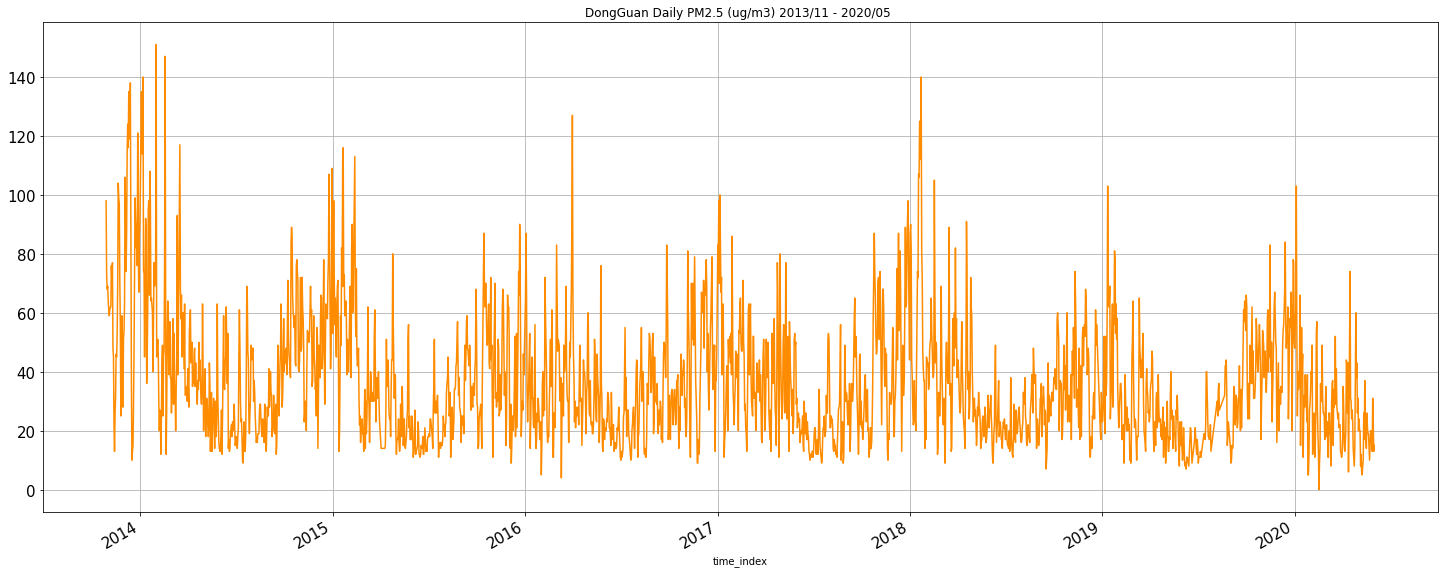

In [4]:
#将每日数据绘制成折线图
plot=df['PM2.5(μg/m3)'].plot(figsize=(25,10),title="DongGuan Daily PM2.5 (ug/m3) 2013/11 - 2020/05 ",color='darkorange', grid=True,fontsize=15)
fig=plot.get_figure()
fig.savefig("DongGuan Daily PM2.5.png")

#数据太密集，无法看出数据的趋势，数据需要处理

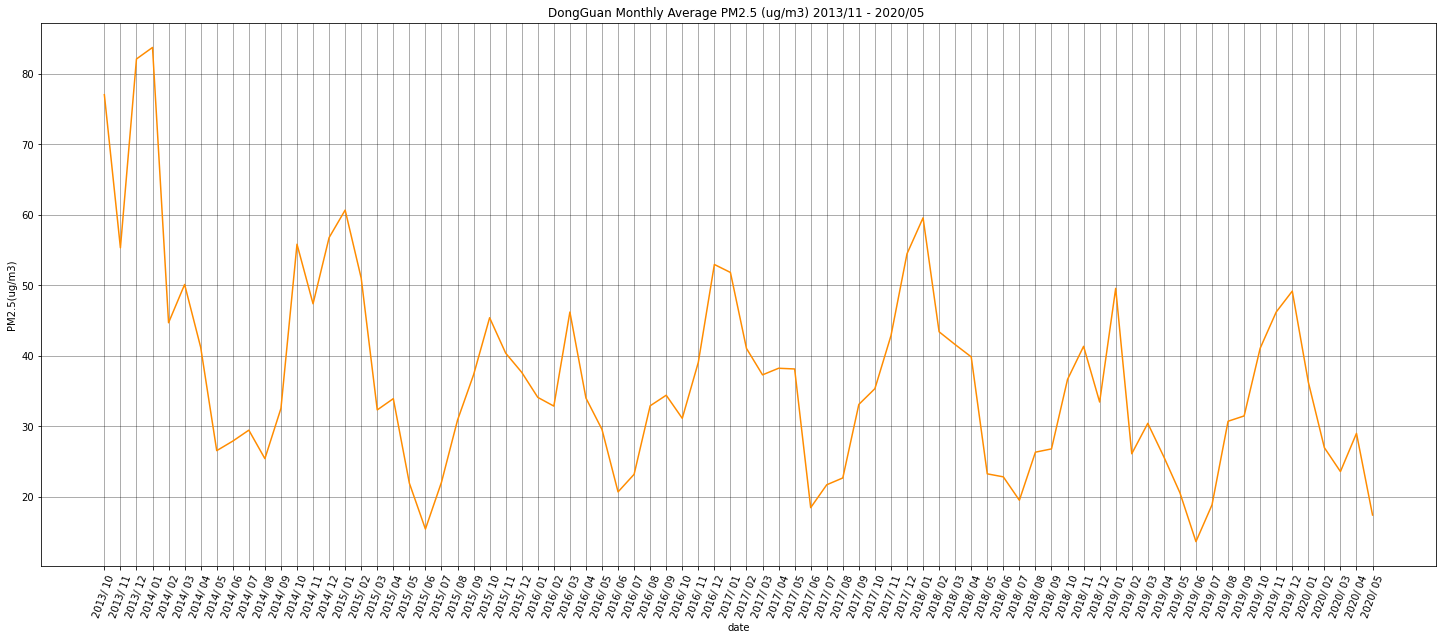

In [5]:
#降低数据采样频率
df1=df.resample('M').mean()     #月份采样，取月平均值
 
#绘制折线图：
plt.figure(figsize=(25,10))
data=df1['PM2.5(μg/m3)']
#print(data.index)
#print(data.values)
 
_x=data.index
_y=data.values
_x = [i.strftime("%Y/ %m") for i in _x]
plt.plot(range(len(_x)), _y,'darkorange')
plt.xticks(range(len(_x)), _x, rotation=70)
plt.grid(color='black', linestyle='-', linewidth=0.8,alpha=0.4)
plt.xlabel('date')
plt.ylabel('PM2.5(ug/m3)')
plt.title('DongGuan Monthly Average PM2.5 (ug/m3) 2013/11 - 2020/05 ')
plt.savefig('DongGuan Monthly Average PM2.5.png')
plt.show()

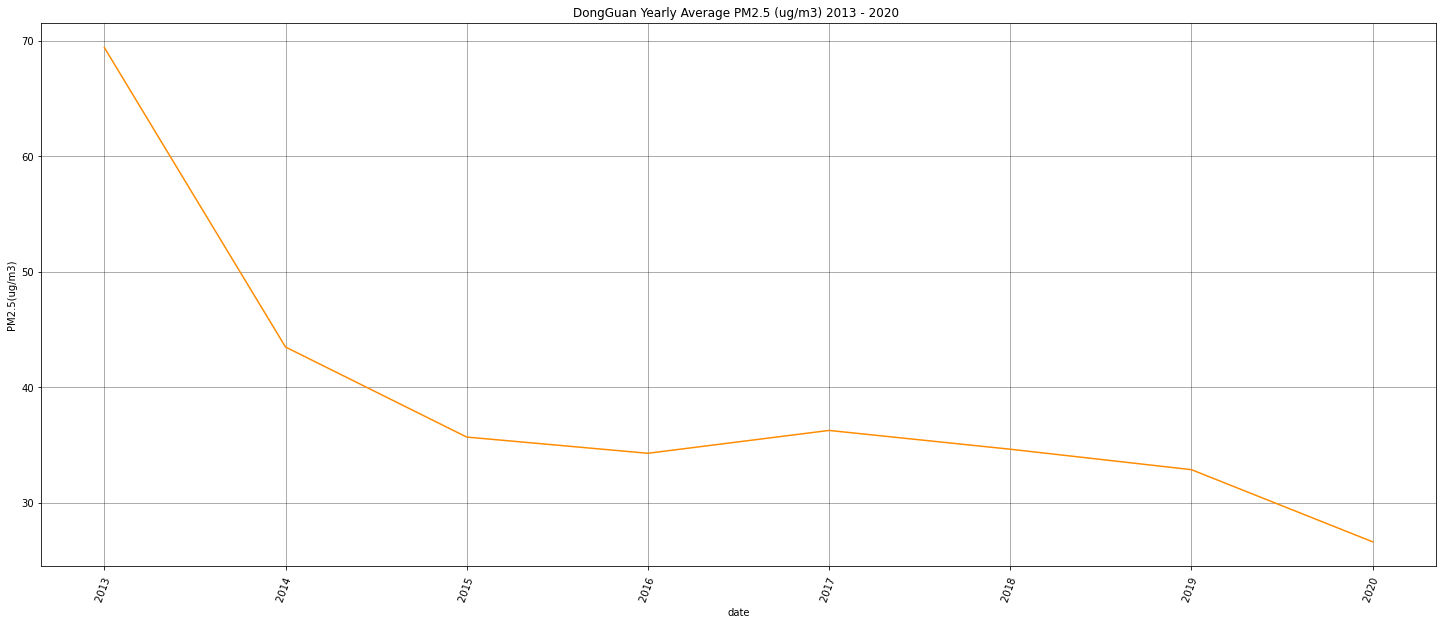

In [6]:
#为了更清楚地看到数据趋势，再次降低数据采样频率
df2=df.resample('Y').mean()   #年份采样，取年平均
 
#绘制折线图：
plt.figure(figsize=(25,10))
data=df2['PM2.5(μg/m3)']
#print(data.index)
#print(data.values)
 
_x=data.index
_y=data.values
_x = [i.strftime("%Y ") for i in _x]
plt.plot(range(len(_x)), _y,'darkorange')
plt.xticks(range(len(_x)), _x, rotation=70)
plt.grid(color='black', linestyle='-', linewidth=0.8,alpha=0.4)
plt.xlabel('date')
plt.ylabel('PM2.5(ug/m3)')
plt.title('DongGuan Yearly Average PM2.5 (ug/m3) 2013 - 2020 ')
plt.savefig('DongGuan Yearly Average PM2.5.png')
plt.show()

PM2.5含量逐年下降的主要原因可能是：

（1）政府出台相关政策，控制源头，加强工业粉尘治理

（2）城市汽车限行，控制尾气排放

（3）改善了能源消耗结构

（4）人们对PM2.5的危害有更加深刻的认识和了解


In [7]:
#为了接下来的数据处理和可视化，需要增加一些字段

df['dayofyear'] = df.index.dayofyear   #添加一年中第几天字段
df['dayofweek'] = df.index.dayofweek   #添加星期几字段（0-6）
df['season'] = df.index.quarter        #添加季节字段（1-4）
df['year']=df.index.year               #增加年字段


In [8]:
df.nsmallest(10,'PM2.5(μg/m3)')  #查看数据中某日PM2.5含量最低的前10名

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3),dayofyear,dayofweek,season,year
time_index,,,,,,,,,,,,,,
2020-02-16,2020-02-16,优,13,16,0,3,7,8,0.73,41,47,6,1,2020
2016-03-10,2016-03-10,优,14,3,4,5,4,18,0.63,31,70,3,1,2016
2020-05-08,2020-05-08,优,15,9,5,15,6,9,0.45,36,129,4,2,2020
2020-01-26,2020-01-26,优,11,9,5,8,6,9,0.87,28,26,6,1,2020
2020-01-27,2020-01-27,优,16,24,5,7,6,6,0.68,49,27,0,1,2020
2016-02-01,2016-02-01,优,15,11,5,5,6,15,0.84,31,32,0,1,2016
2020-05-07,2020-05-07,优,16,7,6,15,5,9,0.40,40,128,3,2,2020
2020-04-12,2020-04-12,优,23,6,6,10,8,16,0.67,71,103,6,2,2020
2019-06-09,2019-06-09,优,25,21,7,20,6,13,0.65,46,160,6,2,2019


In [9]:
df.nlargest(10,'PM2.5(μg/m3)')     #查看数据中某日PM2.5含量最高的前10名

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3),dayofyear,dayofweek,season,year
time_index,,,,,,,,,,,,,,
2014-01-31,2014-01-31,中度污染,194,78,151,168,31,40,1.25,89,31,4,1,2014
2014-02-17,2014-02-17,中度污染,191,175,147,187,63,139,2.34,16,48,0,1,2014
2018-01-22,2018-01-22,中度污染,183,334,140,77,19,73,1.54,48,22,0,1,2018
2014-01-06,2014-01-06,中度污染,186,117,140,179,31,72,1.58,113,6,0,1,2014
2013-12-13,2013-12-13,中度污染,190,100,138,163,47,75,1.69,20,347,4,4,2013
2014-01-03,2014-01-03,中度污染,179,119,135,170,52,115,1.95,50,3,4,1,2014
2013-12-10,2013-12-10,中度污染,165,98,135,161,50,48,1.49,115,344,1,4,2013
2016-03-31,2016-03-31,中度污染,168,346,127,160,19,78,1.23,82,91,3,1,2016
2018-01-19,2018-01-19,中度污染,165,255,125,148,21,116,1.42,30,19,4,1,2018


接着我们要用年份来分组，查看每年PM2.5含量数据的情况并画出相关数据图像

In [33]:
groupby_year=df['PM2.5(μg/m3)'].groupby(df['year'])  #按年划分数据
groupby_year.describe()  

#可以看到每年的PM2.5的 总和，平均值，最大最小值等等的数据都已自动算好

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,65.0,69.400000,31.707550,10.0,48.0,69.0,90.00,138.0
2014,361.0,43.481994,24.043256,9.0,26.0,40.0,56.00,151.0
2015,359.0,35.688022,20.001750,9.0,19.5,30.0,47.50,116.0
2016,366.0,34.284153,17.465304,4.0,22.0,31.0,44.00,127.0
2017,366.0,36.262295,19.372542,9.0,21.0,32.0,48.75,100.0
2018,355.0,34.636620,19.708477,7.0,22.0,30.0,42.00,140.0
2019,333.0,32.867868,17.258505,7.0,20.0,30.0,44.00,103.0
2020,152.0,26.625000,15.135946,0.0,15.0,25.5,34.00,103.0


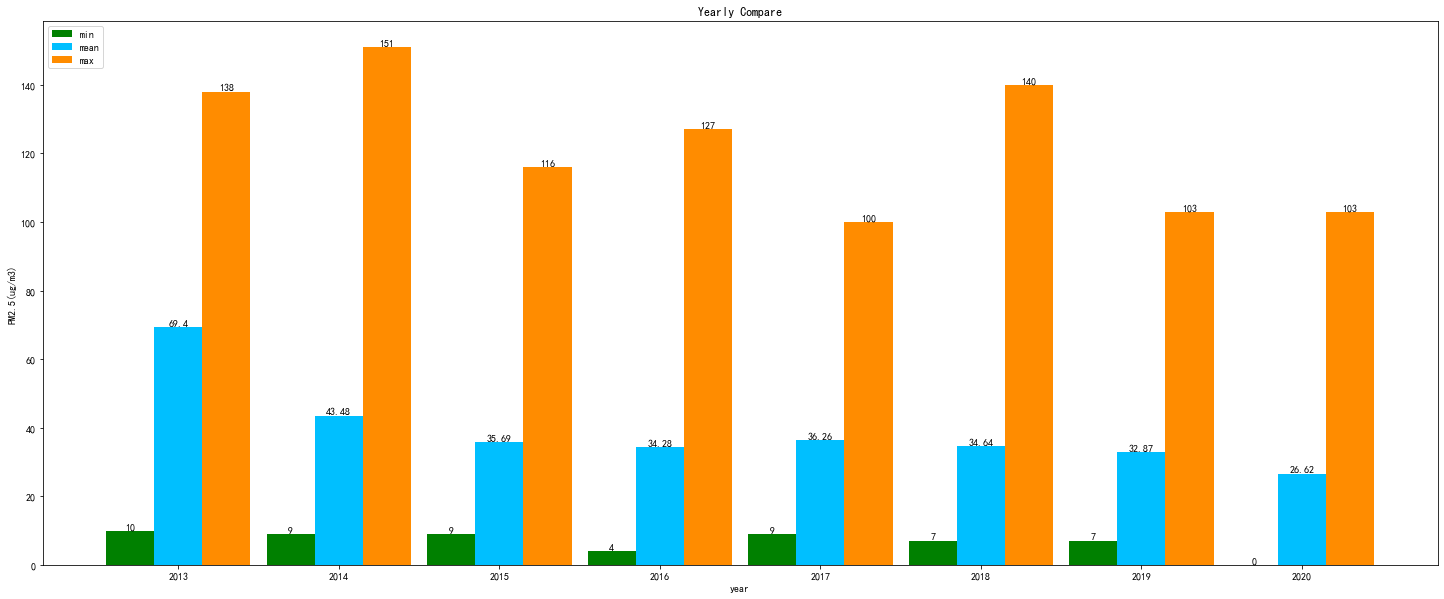

In [34]:
#绘制柱状图查看每年PM2.5最大、最小和平均含量

year=['2013','2014','2015','2016','2017','2018','2019','2020']
y1=groupby_year.min().tolist()    #最小值list

meanlist=groupby_year.mean().tolist()
y2=[round(i,2) for i in meanlist]    #平均值list只保留小数点后3位

y3=groupby_year.max().tolist()     #最大值list

x = np.arange(len(year))
width=0.3

plt.bar(x,y1,width=width,label='min',color='green')
plt.bar(x+width,y2,width=width,label='mean',color='deepskyblue',tick_label=year)
plt.bar(x+2*width,y3,width=width,label='max',color='darkorange')

#在图中每个柱条显示数据大小
for a,b in zip(x,y1):
    plt.text(a,b+0.1,b,ha='center',va='bottom')
for a,b in zip(x,y2):
    plt.text(a+width,b+0.1,b,ha='center',va='bottom')
for a,b in zip(x,y3):
    plt.text(a+2*width,b+0.1,b,ha='center', va='bottom')


plt.rcParams['figure.figsize']=(25.0,10.0)
plt.xlabel('year')
plt.ylabel('PM2.5(ug/m3)')
plt.xticks()
plt.legend(loc="upper left")
plt.title("Yearly Compare")
plt.savefig('Yearly compare.png')
plt.show()

接着绘制饼图查看每年空气污染程度占比，（这里排除了2013年和2020年的数据，因为数据不完整）

In [35]:
#按年划分数据，再按空气质量划分数据
df2014=df[df.year==2014]
groupby_quality2014=df2014['AQI'].groupby(df2014['quality'])  
groupby_quality2014.describe()   #2014年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
中度污染,7.0,172.285714,19.559433,151.0,152.50,179.0,188.5,194.0
优,110.0,38.481818,7.723112,18.0,32.25,39.0,44.0,50.0
良,203.0,72.423645,13.402299,51.0,62.00,70.0,82.0,100.0
轻度污染,41.0,116.634146,12.279569,101.0,106.00,114.0,123.0,146.0


In [36]:
df2015=df[df.year==2015]
groupby_quality2015=df2015['AQI'].groupby(df2015['quality']) 
groupby_quality2015.describe()   #2015年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
中度污染,2.0,153.500000,2.121320,152.0,152.75,153.5,154.25,155.0
优,172.0,36.447674,8.046840,20.0,30.00,37.0,43.00,50.0
良,168.0,72.672619,14.021582,51.0,60.00,71.0,84.00,100.0
轻度污染,17.0,115.647059,12.956375,101.0,107.00,111.0,120.00,148.0


In [37]:
df2016=df[df.year==2016]
groupby_quality2016=df2016['AQI'].groupby(df2016['quality'])  
groupby_quality2016.describe()   #2016年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
中度污染,1.0,168.000000,NaN,168.0,168.0,168.0,168.0,168.0
优,176.0,36.187500,8.398916,14.0,30.0,36.0,43.0,50.0
良,178.0,68.938202,14.269069,51.0,56.0,66.5,80.0,100.0
轻度污染,11.0,115.545455,10.103105,103.0,106.5,115.0,123.5,133.0


In [38]:
df2017=df[df.year==2017]
groupby_quality2017=df2017['AQI'].groupby(df2017['quality'])  
groupby_quality2017.describe()   #2017年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
优,166.0,36.331325,8.241351,18.0,30.0,36.0,44.0,50.0
良,173.0,70.161850,13.317995,51.0,59.0,68.0,81.0,99.0
轻度污染,27.0,113.925926,9.937984,102.0,105.0,114.0,119.0,137.0


In [39]:
df2018=df[df.year==2018]
groupby_quality2018=df2018['AQI'].groupby(df2018['quality'])  
groupby_quality2018.describe()   #2018年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
中度污染,3.0,171.333333,10.115994,165.0,165.5,166.0,174.50,183.0
优,163.0,37.723926,8.560812,15.0,32.0,38.0,45.00,50.0
良,175.0,67.480000,13.026428,51.0,56.0,65.0,74.00,100.0
轻度污染,14.0,123.785714,15.680358,101.0,113.0,120.5,138.25,148.0


In [40]:
df2019=df[df.year==2019]
groupby_quality2019=df2019['AQI'].groupby(df2019['quality'])  
groupby_quality2019.describe()    #2019年数据

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
优,163.0,36.171779,7.990423,17.0,30.00,36.0,42.00,50.0
良,160.0,69.187500,13.173342,51.0,57.75,68.0,79.25,97.0
轻度污染,10.0,109.800000,10.464756,102.0,103.25,105.0,113.50,136.0


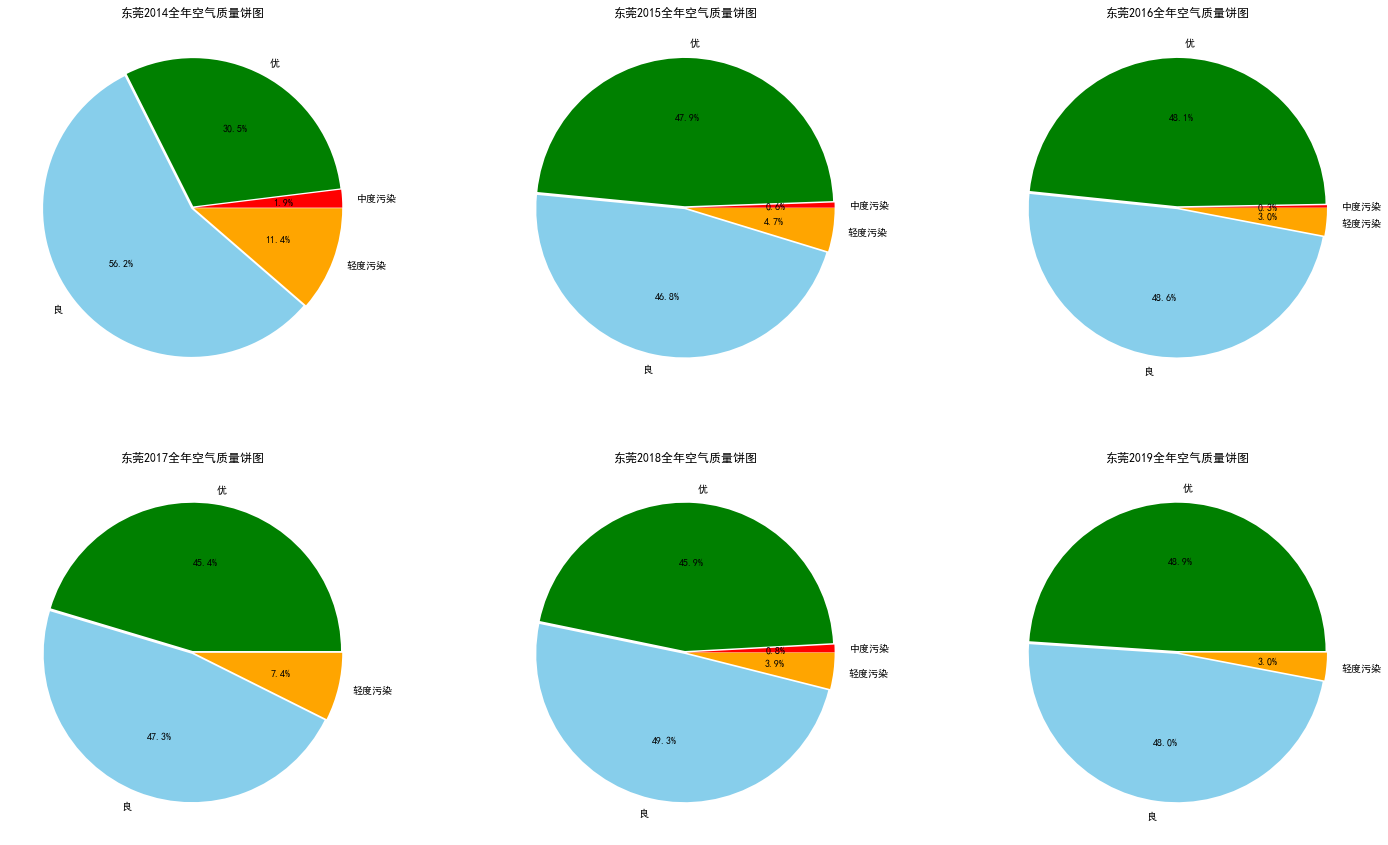

In [41]:
#绘制饼图
labels=['中度污染','优','良','轻度污染']
labels1=['优','良','轻度污染']
count2014=groupby_quality2014.count().tolist()
count2015=groupby_quality2015.count().tolist()
count2016=groupby_quality2016.count().tolist()
count2017=groupby_quality2017.count().tolist()
count2018=groupby_quality2018.count().tolist()
count2019=groupby_quality2019.count().tolist()

ex=[0.01,0.01,0.01,0.01]
ex1=[0.01,0.01,0.01]

pic=plt.figure(figsize=(25,15))

a1=pic.add_subplot(2,3,1)
plt.rcParams['font.sans-serif']='SimHei'
plt.pie(count2014,explode=ex,labels=labels,colors=['red','green','skyblue','orange'],autopct='%1.1f%%')
plt.title('东莞2014全年空气质量饼图')

a1=pic.add_subplot(2,3,2)
plt.pie(count2015,explode=ex,labels=labels,colors=['red','green','skyblue','orange'],autopct='%1.1f%%')
plt.title('东莞2015全年空气质量饼图')

a1=pic.add_subplot(2,3,3)
plt.pie(count2016,explode=ex,labels=labels,colors=['red','green','skyblue','orange'],autopct='%1.1f%%')
plt.title('东莞2016全年空气质量饼图')

a1=pic.add_subplot(2,3,4)
plt.pie(count2017,explode=ex1,labels=labels1,colors=['green','skyblue','orange'],autopct='%1.1f%%')
plt.title('东莞2017全年空气质量饼图')

a1=pic.add_subplot(2,3,5)
plt.pie(count2018,explode=ex,labels=labels,colors=['red','green','skyblue','orange'],autopct='%1.1f%%')
plt.title('东莞2018全年空气质量饼图')

a1=pic.add_subplot(2,3,6)
plt.pie(count2019,explode=ex1,labels=labels1,colors=['green','skyblue','orange'],autopct='%1.1f%%')
plt.title('东莞2019全年空气质量饼图')

plt.savefig('pie.png')



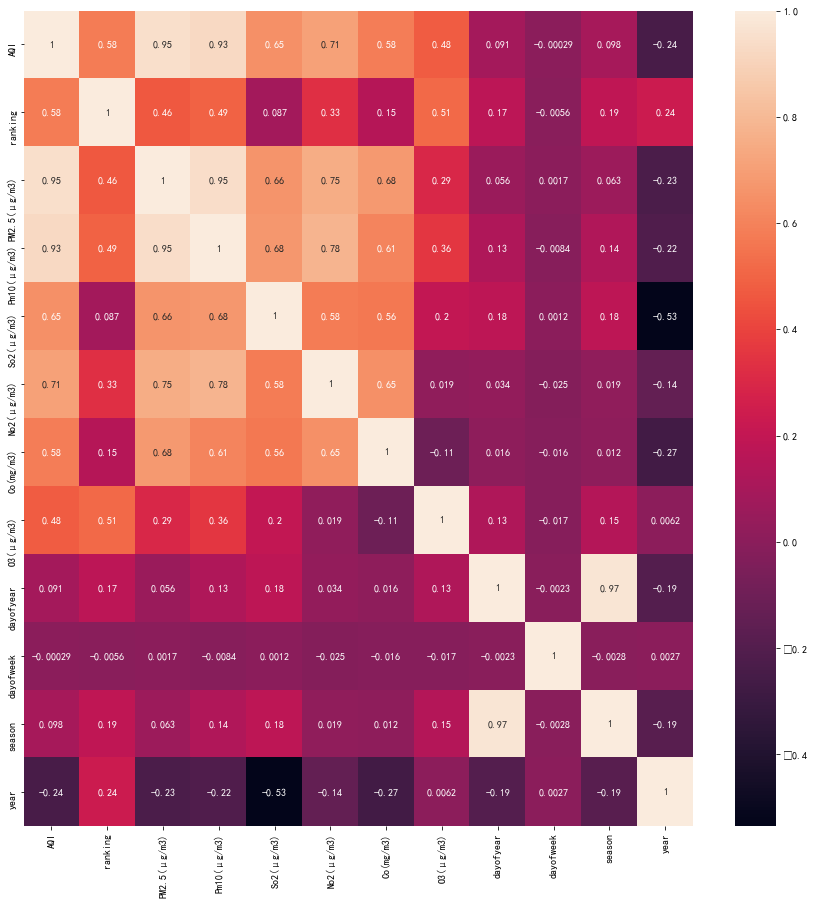

In [42]:
#画出热力图，查看字段间的相关性
#相关系数的绝对值在【0.5,1】之间是强相关  【0.2,0.5】之间是有一定相关  小于0.1或0.05是无相关
PM_corr = df.corr()
fig=plt.figure(figsize=(15,15))
sns.heatmap(PM_corr,annot=True)
plt.savefig('heatmap.png')

#注重分析PM2.5字段和其他字段的关系

根据热力图可以得出结论：

（1）PM2.5含量与O3含量有一定相关性，与CO，NO2，SO2的含量强相关。主要原因是这些气体都是污染气体。

（2）PM2.5的含量与AQI指数强相关，即PM2.5的含量影响着AQI指数。

（3）PM2.5与年之间是负相关，含量逐年减少

（4）PM2.5与季节的相关性不大


接着使用 普通线性回归模型、岭回归模型和Lasso回归模型  3种不同的回归模型来预测数据。

第一步划分训练集和测试集

In [43]:
split_percent=0.2
data_train=df.iloc[int(len(df)*split_percent):]  #前80%的数据划为训练集 
data_test=df.iloc[:int(len(df)*split_percent)]   #剩余20%划为测试集   

test_time=data_test['date']
#type(test_time)
data_test    #测试集数据范围是2019年1月17日 —— 2020年5月1日
#data_train

,date,quality,AQI,ranking,PM2.5(μg/m3),Pm10(μg/m3),So2(μg/m3),No2(μg/m3),Co(mg/m3),O3(μg/m3),dayofyear,dayofweek,season,year
time_index,,,,,,,,,,,,,,
2020-05-01,2020-05-01,优,37,49,20,33,8,27,0.53,45,122,4,2,2020
2020-05-02,2020-05-02,优,36,60,24,32,7,17,0.54,62,123,5,2,2020
2020-05-03,2020-05-03,优,46,135,20,34,8,20,0.58,79,124,6,2,2020
2020-05-04,2020-05-04,优,42,127,20,31,8,18,0.55,66,125,0,2,2020
2020-05-05,2020-05-05,优,27,17,8,25,7,13,0.50,49,126,1,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-13,2019-01-13,良,85,153,62,76,11,54,1.28,26,13,6,1,2019
2019-01-14,2019-01-14,良,86,151,63,77,10,58,1.27,48,14,0,1,2019
2019-01-15,2019-01-15,良,93,230,69,81,10,67,1.40,14,15,1,1,2019


In [44]:
#剔除字符串字段
data_train=data_train.drop(['date','quality'], axis = 1)
data_test=data_test.drop(['date','quality'], axis = 1)

In [45]:
y_train=data_train['PM2.5(μg/m3)'].values
x_train=data_train.drop('PM2.5(μg/m3)', axis = 1).values

y_true=data_test['PM2.5(μg/m3)'].values
x_test=data_test.drop('PM2.5(μg/m3)', axis = 1).values

In [46]:
y_true   #PM2.5含量真实值（2019-01-17 ——  2020-05-01）

array([ 20,  24,  20,  20,   8,  12,   6,   5,   8,  10,  26,  17,  37,
        19,  17,  14,  26,  21,  19,  19,  14,  10,  15,  20,  18,  20,
        13,  31,  23,  13,  15,  18,  35,  27,  15,  13,  16,  20,  44,
        42,  26,  43,   6,  24,  51,  74,  31,  30,  24,  27,  23,  14,
        11,   8,  14,  36,  60,  38,  43,  26,  31,  21,  18,  23,  11,
        11,  26,  26,  20,  18,   8,  29,  36,  37,  15,  34,  28,  31,
        52,  29,  41,  28,  26,  24,  26,  21,  22,  22,  13,  12,  11,
        12,  40,  39,  49,  12,  18,  21,  26,  11,  15,  26,  53,  57,
        28,  19,  13,   0,   9,  14,  36,  30,  30,  49,  31,  26,  26,
        25,  17,  27,  35,  48,  56,  61, 103,  54,  25,  40,  34,  36,
        41,  66,  15,  33,  55,  39,  46,  11,  26,  32,  28,  39,  31,
        32,  23,  39,   5,   5,  12,  27,  29,  33,  43,  20,  30,  34,
        29,  35,  33,  33,  49,  54,  56,  61,  68,  84,  56,  48,  53,
        55,  62,  24,  35,  51,  58,  55,  67,  58,  20,  48,  7

使用普通的线性回归模型

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

np.around(y_pred,decimals=1)  #控制输出小数点后一位
#PM2.5含量 普通线性回归模型 预测结果

array([ 21.2,  19.7,  22.8,  20.8,  14.4,  13.6,   5.9,   6.2,  11.4,
        13.6,  27.4,  18.5,  36. ,  22. ,  19.8,  20.4,  27.4,  17.9,
        18.2,  20. ,  13.5,  14.8,  19.8,  20.8,  20.7,  16.6,  19.7,
        36.9,  23.4,  11.8,  18.7,  17.1,  34.6,  27.9,  11.9,  11.8,
        14.9,  17.7,  41. ,  41.2,  29. ,  45.1,   6.7,  18.8,  45.1,
        69.6,  27.7,  27.7,  26.9,  25.6,  19.5,  14.2,  15.4,  10.3,
        13.3,  31.1,  55.1,  33.1,  43.8,  34.8,  33.1,  14. ,  14.9,
        19. ,   8.6,   9.2,  19.2,  21.4,  16.2,  14.6,  10.7,  30.3,
        36.2,  36.1,  13.9,  33.1,  31. ,  35.4,  50.9,  25.3,  37.8,
        28.7,  26.3,  21.2,  24.8,  21. ,  20.9,  22.5,  13.3,  20.6,
        13.2,  14.8,  30.1,  29.3,  40.6,   9.1,  13.9,  12.3,  21.6,
         6.3,  10.9,  21.4,  45. ,  50.2,  23.9,  13. ,   7.6,   3.6,
         8. ,  10.2,  28.2,  23.3,  23.9,  40.5,  23.4,  24.7,  20.4,
        20.9,  11.4,  16.8,  28.5,  48.3,  52. ,  56.1,  93.9,  44.6,
        23.6,  35. ,

接着使用岭回归模型

In [48]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

reg=Ridge(alpha = 0.01)
reg.fit(x_train, y_train)
y_pred_reg=reg.predict(x_test)
((y_pred_reg-y_true)**2).mean()
reg_cv=RidgeCV(alphas=[0.1, 1.0, 10.0])
reg_cv.fit(x_train, y_train)
y_pred_regcv=reg_cv.predict(x_test)

np.around(y_pred_regcv,decimals=1)  #控制输出小数点后一位
#PM2.5含量 岭回归模型 预测结果

array([ 21.2,  19.7,  22.8,  20.8,  14.4,  13.6,   5.9,   6.2,  11.4,
        13.6,  27.4,  18.5,  36. ,  22. ,  19.8,  20.4,  27.4,  17.9,
        18.2,  20. ,  13.5,  14.8,  19.8,  20.8,  20.7,  16.6,  19.7,
        36.9,  23.4,  11.8,  18.7,  17.1,  34.6,  27.9,  11.9,  11.8,
        14.9,  17.7,  41. ,  41.2,  29. ,  45.1,   6.7,  18.8,  45.1,
        69.6,  27.7,  27.7,  26.9,  25.6,  19.5,  14.2,  15.4,  10.2,
        13.3,  31.1,  55.1,  33.1,  43.8,  34.8,  33.1,  14. ,  14.9,
        19. ,   8.6,   9.2,  19.2,  21.4,  16.2,  14.6,  10.7,  30.3,
        36.2,  36.1,  13.9,  33.1,  31. ,  35.4,  50.9,  25.3,  37.8,
        28.8,  26.3,  21.2,  24.8,  21. ,  20.9,  22.5,  13.3,  20.6,
        13.2,  14.8,  30.1,  29.3,  40.6,   9.1,  13.9,  12.3,  21.6,
         6.3,  10.9,  21.4,  45. ,  50.2,  23.9,  13. ,   7.6,   3.6,
         8. ,  10.2,  28.2,  23.3,  23.9,  40.5,  23.4,  24.7,  20.4,
        20.9,  11.4,  16.8,  28.5,  48.3,  52. ,  56.1,  93.9,  44.6,
        23.6,  35. ,

最后使用Lasso回归模型

In [49]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
y_pred_lasso=lasso.predict(x_test)
np.around(y_pred_lasso,decimals=1)  #控制输出小数点后一位
#PM2.5含量 Lasso回归模型 预测结果

array([ 21.3,  19.7,  22.8,  20.8,  14.5,  13.7,   6. ,   6.3,  11.4,
        13.6,  27.3,  18.5,  36. ,  22. ,  19.8,  20.5,  27.4,  17.9,
        18.2,  20.1,  13.5,  14.7,  19.7,  20.7,  20.7,  16.6,  19.7,
        36.9,  23.5,  11.9,  18.8,  17.1,  34.6,  27.9,  11.8,  11.7,
        14.8,  17.7,  40.9,  41.2,  29. ,  45.1,   6.6,  18.8,  45.2,
        69.6,  27.7,  27.7,  27. ,  25.7,  19.5,  14.3,  15.4,  10.2,
        13.3,  31.1,  55.1,  33.1,  43.8,  34.8,  33.2,  14.2,  15. ,
        19.1,   8.7,   9.2,  19.3,  21.5,  16.4,  14.8,  10.7,  30.3,
        36.3,  36.3,  13.9,  33.2,  31.1,  35.6,  51.1,  25.4,  37.9,
        28.9,  26.5,  21.4,  24.9,  21.1,  21.1,  22.7,  13.4,  20.7,
        13.4,  14.9,  30.2,  29.3,  40.7,   9.1,  14. ,  12.3,  21.7,
         6.3,  10.9,  21.4,  45.1,  50.3,  24. ,  13.1,   7.6,   3.6,
         8. ,  10.3,  28.3,  23.3,  23.9,  40.5,  23.5,  24.8,  20.5,
        21. ,  11.6,  17. ,  28.7,  48.3,  52. ,  56.1,  94. ,  44.7,
        23.6,  35. ,

三种回归模型的评价


In [50]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score

print('线性回归模型评价')
print('数据线性回归模型的平均绝对误差为',mean_absolute_error(y_true,y_pred).round(8))
print('数据线性回归模型的均方误差为',mean_squared_error(y_true,y_pred).round(8))
print('数据线性回归模型的中值绝对误差为',median_absolute_error(y_true,y_pred).round(8))
print('数据线性回归模型的可解释方差值为',explained_variance_score(y_true,y_pred).round(8))
print('数据线性回归模型的R方值为',r2_score(y_true,y_pred).round(8))

线性回归模型评价
数据线性回归模型的平均绝对误差为 3.56874353
数据线性回归模型的均方误差为 20.3564203
数据线性回归模型的中值绝对误差为 3.0568828
数据线性回归模型的可解释方差值为 0.92459267
数据线性回归模型的R方值为 0.9245316


In [51]:
print('岭回归模型评价')
print('数据岭回归模型的平均绝对误差为',mean_absolute_error(y_true,y_pred_regcv).round(8))
print('数据岭回归模型的均方误差为',mean_squared_error(y_true,y_pred_regcv).round(8))
print('数据岭回归模型的中值绝对误差为',median_absolute_error(y_true,y_pred_regcv).round(8))
print('数据岭回归模型的可解释方差值为',explained_variance_score(y_true,y_pred_regcv).round(8))
print('数据岭回归模型的R方值为',r2_score(y_true,y_pred_regcv).round(8))

岭回归模型评价
数据岭回归模型的平均绝对误差为 3.56812965
数据岭回归模型的均方误差为 20.35086663
数据岭回归模型的中值绝对误差为 3.05506909
数据岭回归模型的可解释方差值为 0.92461231
数据岭回归模型的R方值为 0.92455219


In [52]:
print('Lasso回归模型评价')
print('数据Lasso回归模型的平均绝对误差为',mean_absolute_error(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的均方误差为',mean_squared_error(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的中值绝对误差为',median_absolute_error(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的可解释方差值为',explained_variance_score(y_true,y_pred_lasso).round(8))
print('数据Lasso回归模型的R方值为',r2_score(y_true,y_pred_lasso).round(8))

Lasso回归模型评价
数据Lasso回归模型的平均绝对误差为 3.55641953
数据Lasso回归模型的均方误差为 20.25341245
数据Lasso回归模型的中值绝对误差为 3.07445162
数据Lasso回归模型的可解释方差值为 0.92496754
数据Lasso回归模型的R方值为 0.92491348


绘制折线图，看不同模型间的拟合程度

首先将预测的结果转为 DataFrame

In [63]:
#真实值
time=test_time.values
df_true=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_true})
df_true['time_index'] = pd.to_datetime(df_true['date']) #把时间字符串转为索引
df_true.set_index('time_index',inplace=True)
#df_true

#普通线性回归模型预测的结果
df_mod1=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_pred})
df_mod1['time_index'] = pd.to_datetime(df_mod1['date']) #把时间字符串转为索引
df_mod1.set_index('time_index',inplace=True)
#df_mod1

#岭回归模型预测的结果
df_mod2=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_pred_regcv})
df_mod2['time_index'] = pd.to_datetime(df_mod2['date']) #把时间字符串转为索引
df_mod2.set_index('time_index',inplace=True)
#df_mod2

#Lasso回归模型预测的结果
df_mod3=pd.DataFrame({'date':time,'PM2.5(μg/m3)':y_pred_lasso})
df_mod3['time_index'] = pd.to_datetime(df_mod3['date']) #把时间字符串转为索引
df_mod3.set_index('time_index',inplace=True)
#df_mod3

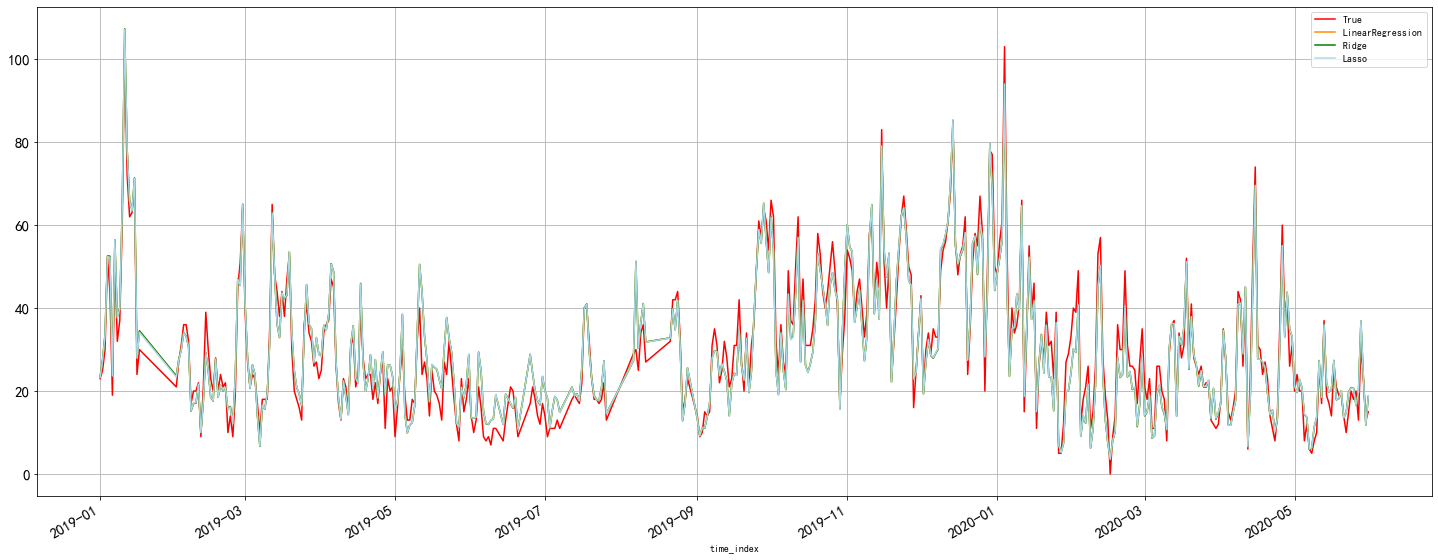

In [64]:
#绘制图像
df_true['PM2.5(μg/m3)'].plot(figsize=(25,10),color='red', grid=True,fontsize=15,label='True')                       #真实数据
df_mod1['PM2.5(μg/m3)'].plot(figsize=(25,10),color='darkorange', grid=True,fontsize=15,label='LinearRegression')     #普通线性回归模型预测数据
df_mod2['PM2.5(μg/m3)'].plot(figsize=(25,10),color='green', grid=True,fontsize=15,label='Ridge')                    #岭回归模型预测数据
df_mod3['PM2.5(μg/m3)'].plot(figsize=(25,10),color='lightblue', grid=True,fontsize=15,label='Lasso')                 #Lasso回归模型预测数据
plt.xticks()
plt.legend(loc="upper right")
plt.savefig('Model Compare.png')


从图中也可以看到，三种模型预测的结果差别不大